In [3]:
#Load libraries 
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn import preprocessing
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
import time

Matplotlib is building the font cache; this may take a moment.


In [32]:
#Preprocess dataset
df = pd.read_csv('../data/period_dataset.csv')
df.head()

,148239.5,1,0.2,149211,1.1
0,138135.0,0.666667,0.466667,210478,1
1,226863.0,1.000000,0.200000,228424,1
2,210482.0,1.000000,0.200000,212674,1
3,233415.0,1.000000,0.200000,237036,1
4,217035.0,1.000000,0.200000,218946,1


In [33]:
df.shape

(2294, 5)

In [34]:
df.info

<bound method DataFrame.info of       148239.5         1       0.2  149211  1.1
0     138135.0  0.666667  0.466667  210478    1
1     226863.0  1.000000  0.200000  228424    1
2     210482.0  1.000000  0.200000  212674    1
3     233415.0  1.000000  0.200000  237036    1
4     217035.0  1.000000  0.200000  218946    1
...        ...       ...       ...     ...  ...
2289  151784.0  1.000000  0.200000  101189    1
2290  155608.5  1.000000  0.200000  103742    1
2291  154385.5  1.000000  0.200000  102924    1
2292  154957.0  1.000000  0.200000  103304    1
2293  138660.0  1.000000  0.200000   92440    1

[2294 rows x 5 columns]>

In [35]:
#Get all of the rows from the first four columns of the dataset
X = df.values[:,0:4]
#X = np.asarray(X).astype('int')
# Get all of the rows from the last column
y = df.values[:,4]

In [36]:
# Scale the features
min_max_scaler = preprocessing.MinMaxScaler()
X_scale = min_max_scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scale, y, test_size=0.1, random_state = 4)
X_train=np.asarray(X_train).astype(int)
y_train=np.asarray(y_train).astype(int)

In [37]:
#Model ANN
model = Sequential([
    Dense(100, activation='relu', input_dim=4),
    Dense(150, activation='relu'),
    Dense(50, activation='relu'),
    Dense(1, activation='sigmoid')
])
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

/Users/dasha/Downloads/Darya DDOA paper simulation/myenv/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [38]:
#training model
hist = model.fit(X_train, y_train,
          batch_size=57, epochs=100, validation_split=0.2)

Epoch 1/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6032 - loss: 0.6870 - val_accuracy: 0.6852 - val_loss: 0.6542
Epoch 2/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 916us/step - accuracy: 0.7081 - loss: 0.6279 - val_accuracy: 0.6538 - val_loss: 0.5247
Epoch 3/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 839us/step - accuracy: 0.6690 - loss: 0.5161 - val_accuracy: 0.6538 - val_loss: 0.4717
Epoch 4/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 841us/step - accuracy: 0.6820 - loss: 0.4755 - val_accuracy: 0.6852 - val_loss: 0.4688
Epoch 5/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 835us/step - accuracy: 0.6887 - loss: 0.4778 - val_accuracy: 0.6852 - val_loss: 0.4688
Epoch 6/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 875us/step - accuracy: 0.6962 - loss: 0.4761 - val_accuracy: 0.6852 - val_loss: 0.4687
Epoch 7/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 825us/step - accuracy: 0.6795 - loss: 0.4812 - val_accuracy: 0.6852 - val_loss: 0.4693
Epoch 8/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 851us/step - accuracy: 0.6780 - loss: 0.4840 - val_accura

In [39]:
model.save("period_model_final.h5")

In [40]:
def preprocess_data(data, scaler):
    # Ensure data is in the correct format and scale it using the same scaler
    scaled_data = scaler.transform(data)
    return scaled_data

In [41]:
from keras.models import load_model

In [43]:
# Load the trained model
model = load_model("period_model_final.h5")

# Example usage of the model
new_data = np.array([[1, 2, 3, 4]])  # Example new data point
scaled_new_data = preprocess_data(new_data, min_max_scaler)
prediction = model.predict(scaled_new_data)
print(f"Prediction for new data: {prediction}")

# Evaluate model on test set
y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype("int32")  # 

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Prediction for new data: [[0.4277102]]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 341us/step


In [44]:
# Evaluate model on test set
y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype("int32") 

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 432us/step


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 345us/step


Text(0.5, 58.7222222222222, 'Predicted')

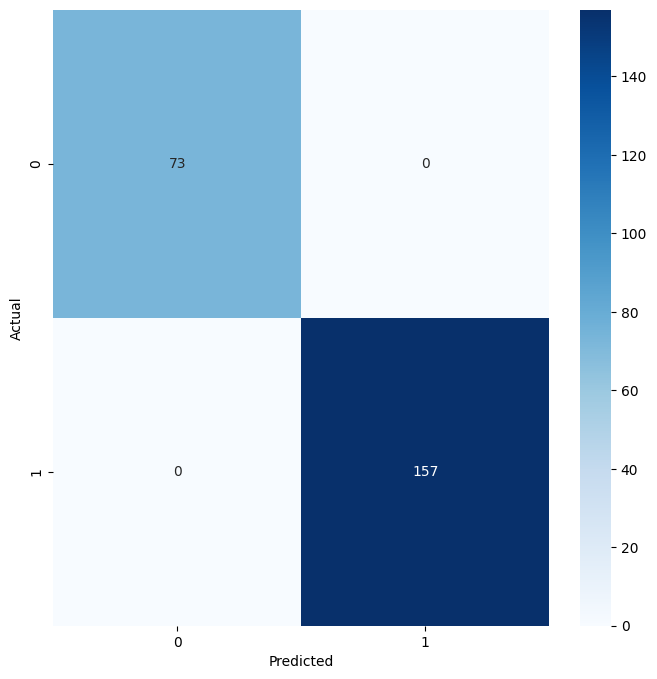

In [46]:
from sklearn.metrics import confusion_matrix
import seaborn as sns 
import matplotlib.pyplot as plt
y_pred=(model.predict(X_test)>0.5).astype("int32")
conf_mat = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(8,8))
sns.heatmap(conf_mat, annot=True, cmap="Blues", fmt='d')
plt.ylabel('Actual')
plt.xlabel('Predicted')

In [47]:
from sklearn.metrics import classification_report
print(f'Classification Report: \n {classification_report(y_test,y_pred)}')

Classification Report: 
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        73
         1.0       1.00      1.00      1.00       157

    accuracy                           1.00       230
   macro avg       1.00      1.00      1.00       230
weighted avg       1.00      1.00      1.00       230

